In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
original_data = pd.read_csv("mushrooms.csv")

In [3]:
#shuffled the orginal dataframe
original_data = original_data.sample(frac=1)

In [25]:
original_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## adding a row / real time queries

In [48]:
#adding columns/ Real Time queries 

original_data.loc[-1] = ['q', 'x', 's', 'n', 't', 'p', 'f', 'c', 'n', 'k', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'k', 's', 'u', 'u','u','u']
original_data.index = original_data.index + 1  # shifting index
original_data = original_data.sort_index()  # sorting by index

### checking to see if row was added

In [47]:
original_data.loc[original_data['class'] == 'q']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,q,x,s,n,t,p,f,c,n,k,...,p,w,o,p,k,s,u,u,u,u


### data and prediction 

In [26]:
X = original_data.drop(["class"], axis =1)

y= original_data["class"]

### column value counts

In [7]:
for attr in X.columns:
    print("\n*", attr, '*')
    print(X[attr].value_counts())


* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
Name: stalk-shape, dtype: int64

* stalk-root *
b    3776


# dropping veil-type because it only has one value type and gives little to no information

In [8]:
X.drop(["veil-type"], axis=1, inplace = True)

### using LabeLEncoder to transform columns with value count of 2 into labels of into 1 and 0 

In [9]:
for col in X.columns:
    if len(X[col].value_counts()) == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,1,0,1,k,0,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,1,a,1,0,0,k,0,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,1,l,1,0,0,n,0,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,1,p,1,0,1,n,0,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,0,n,1,1,0,k,1,...,s,s,w,w,w,o,e,n,a,g


### transforming the rest of the labels into 1 and 0 using pandas get_dummies functions

In [11]:
X = pd.get_dummies(X)

In [12]:
X.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### making 2 cluster

In [13]:
kmeans = KMeans(n_clusters = 2)

In [14]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [15]:
cluster = kmeans.predict(X)

In [16]:
cluster_df = pd.DataFrame()
cluster_df["cluster"] = cluster

cluster_df['class'] = y

cluster_df

,cluster,class
0,1,p
1,1,e
2,1,e
3,1,p
4,1,e
...,...,...
8119,1,e
8120,1,e
8121,1,e
8122,0,p


C:\Users\Cris\Desktop\sample_project_1\env\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


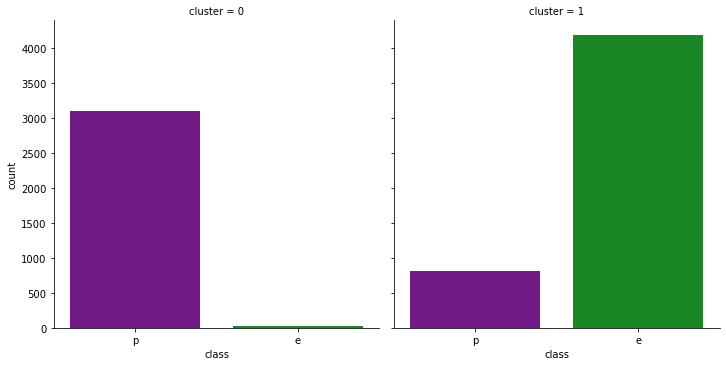

In [17]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count', order=['p','e'], palette=(["#7d069b","#069b15"]))

### transforming y variable into 1 and 0

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
## splitting our trainig and testing data
#80 percent train and 20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.2)

## initiliazing our models 

In [20]:
# K- means with two clusters
kmeans = KMeans(n_clusters=2)

#logistic regression with no special parameters
logreg = LogisticRegression()

## fitting the model

In [21]:
kmeans.fit(X_train) # NO LABELS

logreg.fit(X_train, y_train) #MODEL WITH LABELS 

LogisticRegression()

## prediction variables 

In [22]:
kmeans_pred = kmeans.predict(X_test)

logreg_pred = logreg.predict(X_test)

In [25]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

In [26]:
if accuracy_score(kmeans_pred, y_test, normalize=False) < accuracy_score(kmeans_pred_2, y_test, normalize=False):
    kmeans_pred = kmeans_pred_2

In [27]:
#This DataFrame will allow us to visualize our results.
result_df = pd.DataFrame()

#The column containing the correct class for each mushroom in the test set, 'test_y'.
result_df['y_test'] = np.array(y_test) #(don't wanna make that mistake again!)

#The predictions made by K-Means on the test set, 'test_X'.
result_df['kmeans_pred'] = kmeans_pred

#The column below will tell us whether each prediction made by our K-Means model was correct.
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['y_test']

#The predictions made by Logistic Regression on the test set, 'test_X'.
result_df['logreg_pred'] = logreg_pred

#The column below will tell us whether each prediction made by our Logistic Regression model was correct.
result_df['logreg_correct'] = result_df['logreg_pred'] == result_df['y_test']

C:\Users\Cris\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


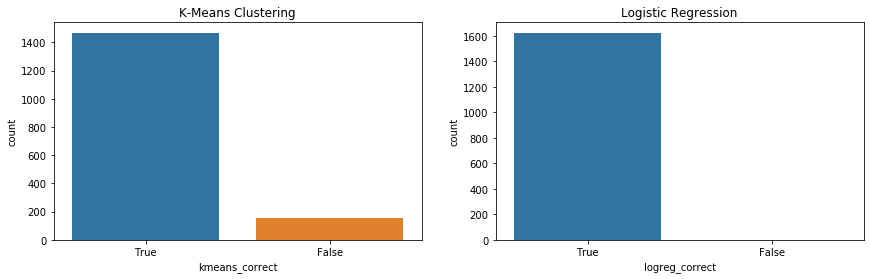

In [28]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(right=2)
sns.countplot(x=result_df['kmeans_correct'], order=[True,False], ax=ax[0]).set_title('K-Means Clustering')
sns.countplot(x=result_df['logreg_correct'], order=[True,False], ax=ax[1]).set_title('Logistic Regression')
fig.show()

In [34]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
nb_score = naive_bayes.score(X_test,y_test)
print("Naive Bayes Accuracy : ",nb_score)

Naive Bayes Accuracy :  0.9415384615384615


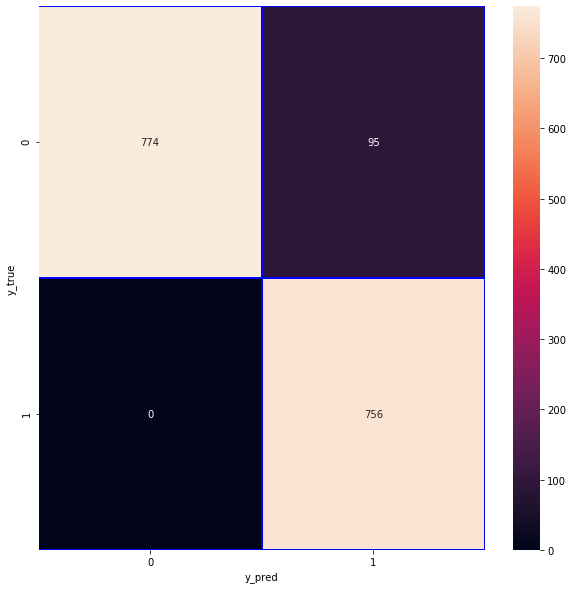

In [35]:
y_pred = naive_bayes.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1.0, penalty = "l2")
lr.fit(X_train,y_train)
print("Logistic Regression Max Score : ",lr.score(X_test,y_test))
lr_max = lr.score(X_test,y_test)

Logistic Regression Max Score :  1.0


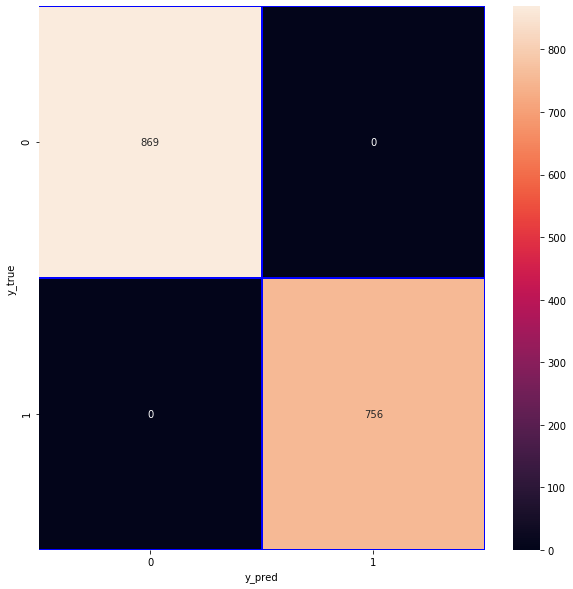

In [41]:
y_pred2 = lr.predict(X_test)
y_true2 = y_test
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_true2,y_pred2)
f, ax = plt.subplots(figsize =(10,10))
sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()